# Selection Task for Research Associate I Position for IITGN project
## Title: Smart Metering & Energy Solutions with Data Analytics & EaaS (Energy as a Service)
## Name: Kirtan Gangani
## Qualification: B.Tech with GPA of 9.41

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Writing a function to use llama (llama-3.3-70b-versatile) using Groq

In [5]:
from groq import Groq
import regex as re

API_KEY = "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"

llama = "llama-3.3-70b-versatile"

def groq_llama(content):
    client = Groq(api_key=API_KEY)
    completion = client.chat.completions.create(
    model= "llama-3.3-70b-versatile",
    messages=[
        {
          "role": "user",
          "content": content
        }
    ],
    temperature=0.15,
    max_completion_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
    )

    output = ""
    for chunk in completion:
        output += chunk.choices[0].delta.content or ""

    # Extract code from markdown code block
    code_blocks = re.findall(r"```(?:python)?\s*([\s\S]*?)```", output)

    if not code_blocks:
        print("No Python code found.")
        return

    code = code_blocks[0]
    print("Extracted code:\n")
    print(code)
    
    print("\nExecuting code output:\n")
    exec(code, globals())

# 2. Types of Prompt Used in this Implementation
#### A) Global Approach: 
This approach involves creating a comprehensive "global prompt" that contains all necessary background information, to which the specific query is then appended.

i) DataFrame column names and its units

ii) Dataset information like number of rows, location and time period (Not required for our current queries but may need for other types of questions)

iii) My problem statement (Generate pandas code, generate graphs if possible and Prioritize memory-efficient operations)

iv) How to calculate active energy consumed (may be required in future)

#### Variations within the Global Approach:
#### 1. One with a deeper level of understanding of the dataset: This likely means the prompt includes more detailed descriptions, relationships between columns, or specific nuances of the data that would allow the model to generate more sophisticated and accurate responses.
#### 2. Other with a low level understanding of the dataset where less important information is eliminated: This variation aims for a more concise prompt by removing information deemed less critical for common queries. This could be beneficial for reducing token usage or improving response time if the model struggles with too much input.

#### B) Local Approach: In contrast to the global approach, the "Local Approach" involves writing a prompt that is precisely tailored to satisfy a single, specific query.


In [8]:
prompt_1 = """
Given is a dataframe named df with the following columns with minute-averaged data:
1.Global_active_power: household global active power (in kilowatt)
2.Global_reactive_power: household global reactive power (in kilowatt)
3.Voltage (in volt)
4.Global_intensity: household global current intensity (in ampere)
5.Sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
6.Sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
7.Sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

Time period is between December 2006 and November 2010 (47 months).
Notes: 
1.(Global_active_power*1000/60 - Sub_metering_1 - Sub_metering_2 - Sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

Assuming my dataset has no NA values and index is datetime parsed into yyyy-mm-dd hh:mm:ss format.
Generate a pandas code while prioritize memory-efficient operations and if possible use matplotlib or seaborn to show some graphs and dont make changes in original dataframe also only provide me code and no explaination whatsoever:
"""

In [10]:
prompt_2 = """
Given is a dataframe named df with the following columns and all data is minute averaged:
Global_active_power (kW), Voltage (V), Sub_metering_1, Sub_metering_2 and Sub_metering_3 (all in Wh)

Assuming I don't have any NA values in my dataframe and index of df is datetime parsed into yyyy-mm-dd hh:mm:ss format. 
Without explaining anything, generate a pandas code while prioritize memory-efficient operations and if possible show some graphs and dont make changes in original dataframe:
"""

prompt_1 has deeper level of understanding while prompt_2 has only basic understanding of dataset and prompt_3 will be local approach where prompt will be tailored to satisfy the query

## 3. Importing .txt file and saving into Pandas DataFrame

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

## 4. Additional Information
#### This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
#### Notes: 
#### 1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
#### 2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [16]:
df['active_energy_consumed'] = (df['Global_active_power']*1000/60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumed
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


# 5. Required Natural Language Queries

## Each Query is subjected to both prompts (one with all the information that LLM requires to generate code for any query and other which is designed specifically for 7 mentioned Natural Language Query)

### --The python code given by llama LLM will be written in this format:
#### ```python
#### {
#### //python code with graphs
#### }
#### ```

# Question 1 What was the average active power consumption in March 2007?
### i) LLM Generated Answer
#### Here I have used the predefined information of dataset and asked the Query to LLM

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for March 2007
march_2007 = df[(df.index >= '2007-03-01') & (df.index < '2007-04-01')]

# Calculate average active power consumption
avg_active_power = march_2007['Global_active_power'].mean()
print(f'Average active power consumption in March 2007: {avg_active_power} kW')

# Calculate daily power consumption
daily_power = march_2007['Global_active_power'].resample('D').mean()

# Plot daily power consumption
plt.figure(figsize=(10,6))
plt.plot(daily_power.index, daily_power.values)
plt.xlabel('Date')
plt.ylabel('Daily Active Power Consumption (kW)')
plt.title('Daily Power Consumption in March 2007')
plt.grid(True)
plt.show()

# Calculate total daily power consumption
total_daily_power = march_2007['Global_active_power'].resample('D').sum() * 60 / 1000  # convert to Wh

# Plot total daily power consumption
plt.figure(figsize=(10,6))
plt.plot(total_daily_power.index, total_daily_power.values)
plt.xlabel('D

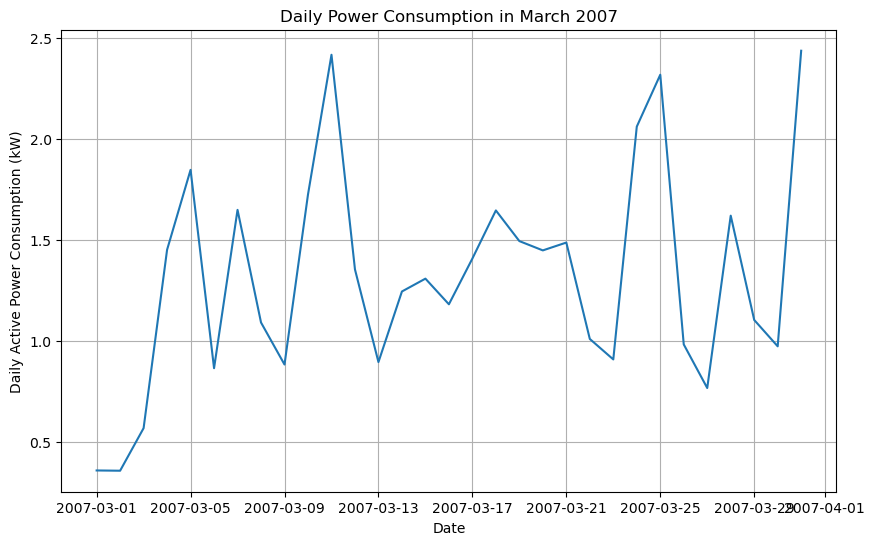

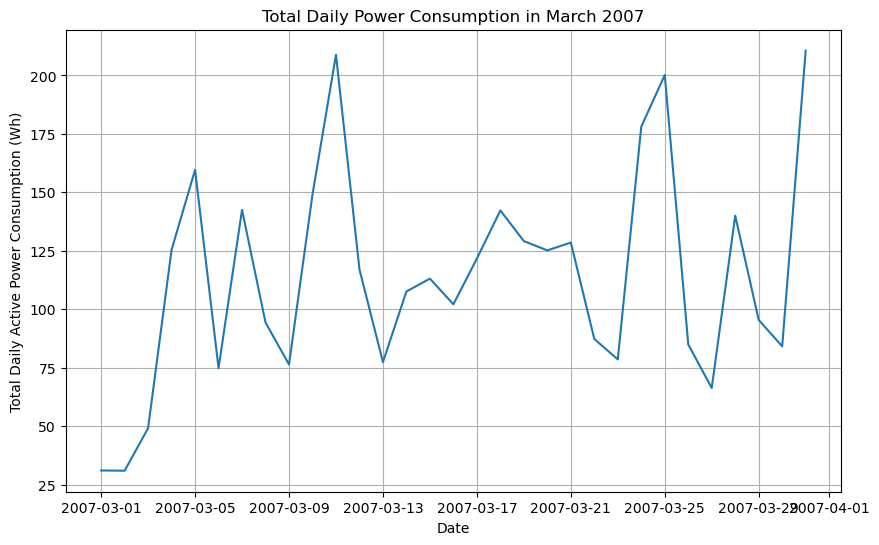

In [22]:
q_1 = prompt_1 + "What was the average active power consumption in March 2007? Also plot daily power consumption of that duration"

groq_llama(q_1)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for March 2007
march_2007_data = df[(df.index.year == 2007) & (df.index.month == 3)].copy()

# Calculate average active power consumption in March 2007
avg_active_power = march_2007_data['Global_active_power'].mean()
print(f"Average active power consumption in March 2007: {avg_active_power} kW")

# Calculate daily power consumption
daily_power_consumption = march_2007_data['Global_active_power'].resample('D').sum()

# Plot daily power consumption
plt.figure(figsize=(10,6))
plt.plot(daily_power_consumption.index, daily_power_consumption.values)
plt.xlabel('Date')
plt.ylabel('Daily Power Consumption (kWh)')
plt.title('Daily Power Consumption in March 2007')
plt.grid(True)
plt.show()


Executing code output:

Average active power consumption in March 2007: 1.3186270301754073 kW


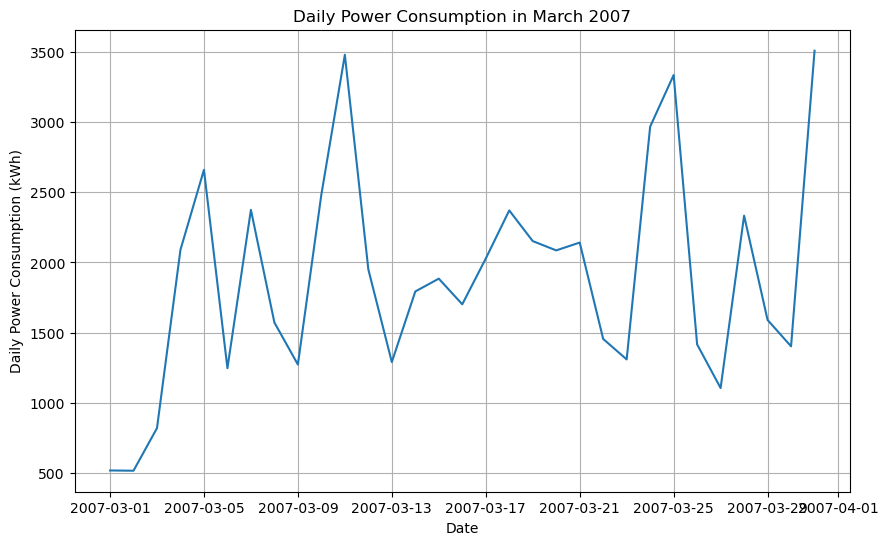

In [25]:
q_1 = prompt_2 + "What was the average active power consumption in March 2007? Also plot daily power consumption of that duration."

groq_llama(q_1)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for March 2007
march_2007_data = df[(df.index.year == 2007) & (df.index.month == 3)]

# Calculate mean power consumption in March 2007
mean_power_consumption = march_2007_data['Global_active_power'].mean()
print(f"Mean power consumption in March 2007: {mean_power_consumption}")

# Resample data to daily frequency and calculate daily power consumption
daily_power_consumption = march_2007_data['Global_active_power'].resample('D').sum()

# Plot daily power consumption
plt.figure(figsize=(10,6))
plt.plot(daily_power_consumption.index, daily_power_consumption.values)
plt.xlabel('Date')
plt.ylabel('Daily Power Consumption')
plt.title('Daily Power Consumption in March 2007')
plt.grid(True)
plt.show()


Executing code output:

Mean power consumption in March 2007: 1.3186270301754073


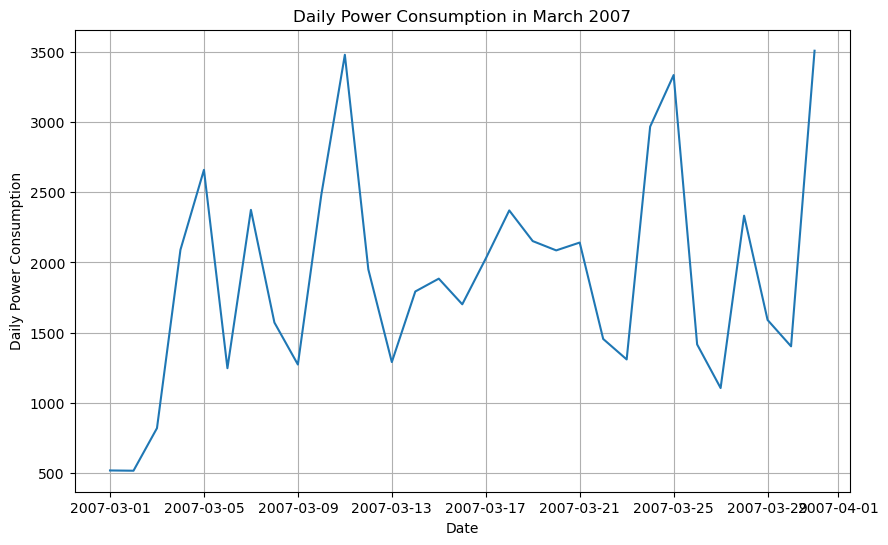

In [30]:
q_1 = "I have a dataframe named df with a column named Global_active_power and index of dataframe is datetime which is already parsed, write me a pandas code to find the mean power consumption in March 2007 and plot a graph of daily power consumption in that duration."

groq_llama(q_1)

### ii) My code

In [33]:
march_2007 = df.loc['2007-03'].Global_active_power.mean()
print(f'Average active power consumption in March 2007: {march_2007:.2f} kW')

Average active power consumption in March 2007: 1.32 kW


Here all 3 prompts correctly generated code and gave answer to the required query.

# Question 2 What hour of the day had the highest power usage on Christmas 2006?
### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Christmas 2006
christmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]

# Calculate power usage for each hour
hourly_power = christmas_2006['Global_active_power'].resample('H').mean()

# Find the hour with the highest power usage
max_hour = hourly_power.idxmax()

# Plot bar graph
plt.figure(figsize=(10,6))
hourly_power.plot(kind='bar')
plt.bar(max_hour.hour, hourly_power[max_hour], color='red')
plt.xlabel('Hour')
plt.ylabel('Power Usage (kW)')
plt.title('Hourly Power Usage on Christmas 2006')
plt.show()


Executing code output:



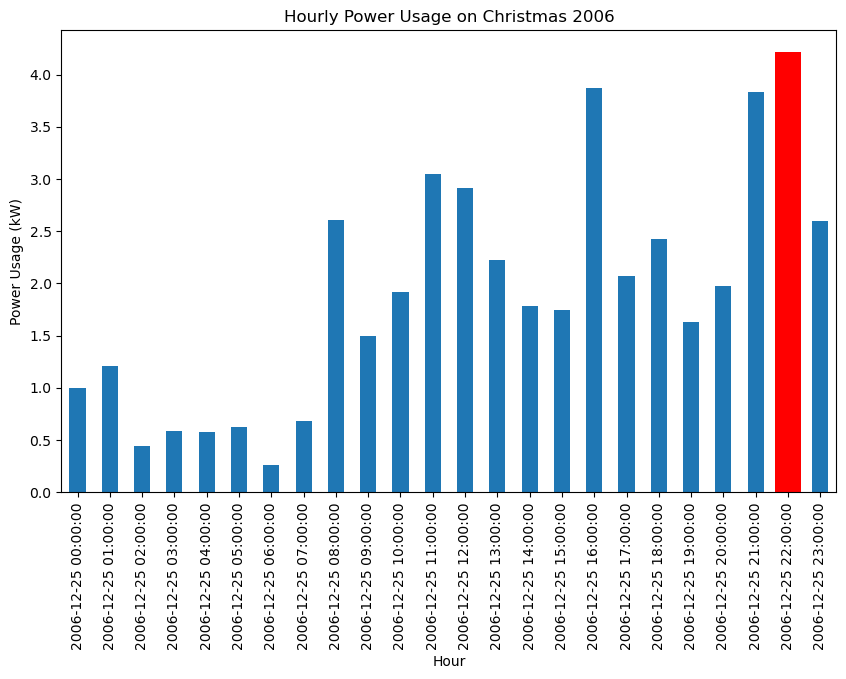

In [40]:
q_2 = prompt_1 + "What hour of the day had the highest power usage on Christmas 2006? Plot bar graph of each hour of that day and mark the highest bar with red."
groq_llama(q_2)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Christmas 2006
christmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]

# Group data by hour and calculate mean power usage
hourly_power_usage = christmas_2006['Global_active_power'].groupby(christmas_2006.index.hour).mean()

# Find the hour with the highest power usage
max_power_hour = hourly_power_usage.idxmax()

# Plot bar graph
plt.figure(figsize=(10,6))
plt.bar(hourly_power_usage.index, hourly_power_usage.values)
plt.bar(max_power_hour, hourly_power_usage[max_power_hour], color='red')
plt.xlabel('Hour')
plt.ylabel('Mean Power Usage (kW)')
plt.title('Hourly Power Usage on Christmas 2006')
plt.show()

print(f"The hour with the highest power usage on Christmas 2006 is {max_power_hour}:00")


Executing code output:



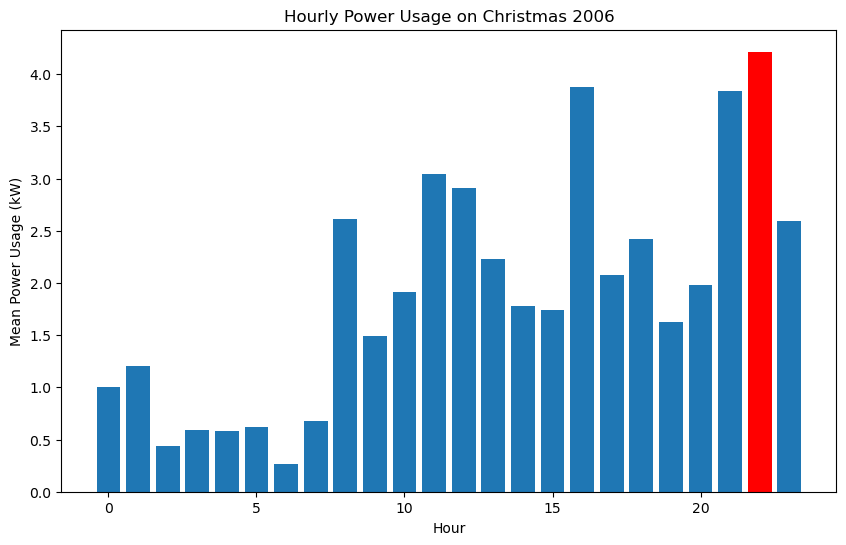

The hour with the highest power usage on Christmas 2006 is 22:00


In [44]:
q_2 = prompt_2 + "What hour of the day had the highest power usage on Christmas 2006? Plot bar graph of each hour of that day and mark the highest bar with red."
groq_llama(q_2)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Christmas 2006
christmas_2006 = df[(df.index.month == 12) & (df.index.day == 25) & (df.index.year == 2006)]

# Group data by hour and calculate mean power consumption
hourly_power = christmas_2006['Global_active_power'].resample('H').mean()

# Find the hour with max power consumption
max_power_hour = hourly_power.idxmax()

# Plot a bar graph
plt.figure(figsize=(10,6))
plt.bar(hourly_power.index.hour, hourly_power.values)
plt.bar(max_power_hour.hour, hourly_power[max_power_hour], color='red')
plt.xlabel('Hour')
plt.ylabel('Global Active Power')
plt.title('Power Consumption on Christmas 2006')
plt.show()


Executing code output:



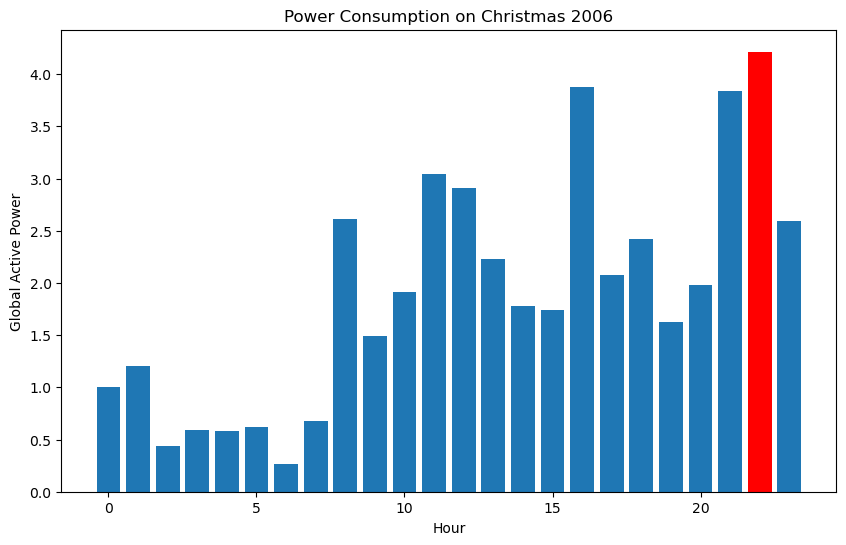

In [47]:
q_2 = "I have a dataframe named df with a column named Global_active_power and index of dataframe is datetime which is already parsed, write me a pandas code to find the hour with max power consumption on Christmas of 2006 and plot a bar graph and mark the highest bar with red."
groq_llama(q_2)

### ii) My code

In [50]:
christmas_2006 = df.loc['2006-12-25']
christmas_2006 = christmas_2006.groupby(christmas_2006.index.hour).Global_active_power.sum()
print(f'{christmas_2006.idxmax()}:00 hour of christmas is when highest power is used with {christmas_2006.max()} kW')

22:00 hour of christmas is when highest power is used with 252.892 kW


All three prompts gave correct result.

# Question 3 Compare energy usage (Global_active_power) on weekdays vs weekends.
### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Extract the day of the week
df_copy['day_of_week'] = df_copy.index.dayofweek

# Create a new column to distinguish between weekdays and weekends
df_copy['day_type'] = df_copy['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Calculate the mean energy usage for weekdays and weekends
mean_energy_usage = df_copy.groupby('day_type')['Global_active_power'].mean()

# Plot a bar graph of mean energy usage
plt.figure(figsize=(8,6))
sns.countplot(x='day_type', data=df_copy, hue='day_type')
plt.bar(mean_energy_usage.index, mean_energy_usage.values)
plt.xlabel('Day Type')
plt.ylabel('Mean Energy Usage (kW)')
plt.title('Mean Energy Usage on Weekdays vs Weekends')
plt.show()

# Plot a histogram of energy usage for weekdays and weekends
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df_copy.l

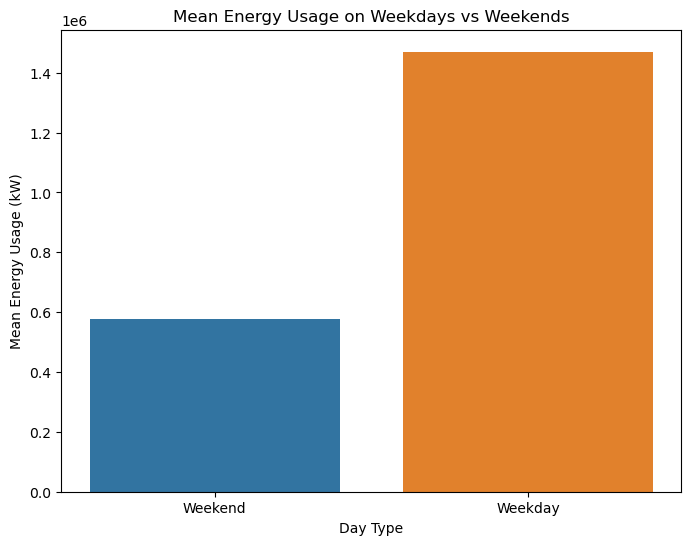

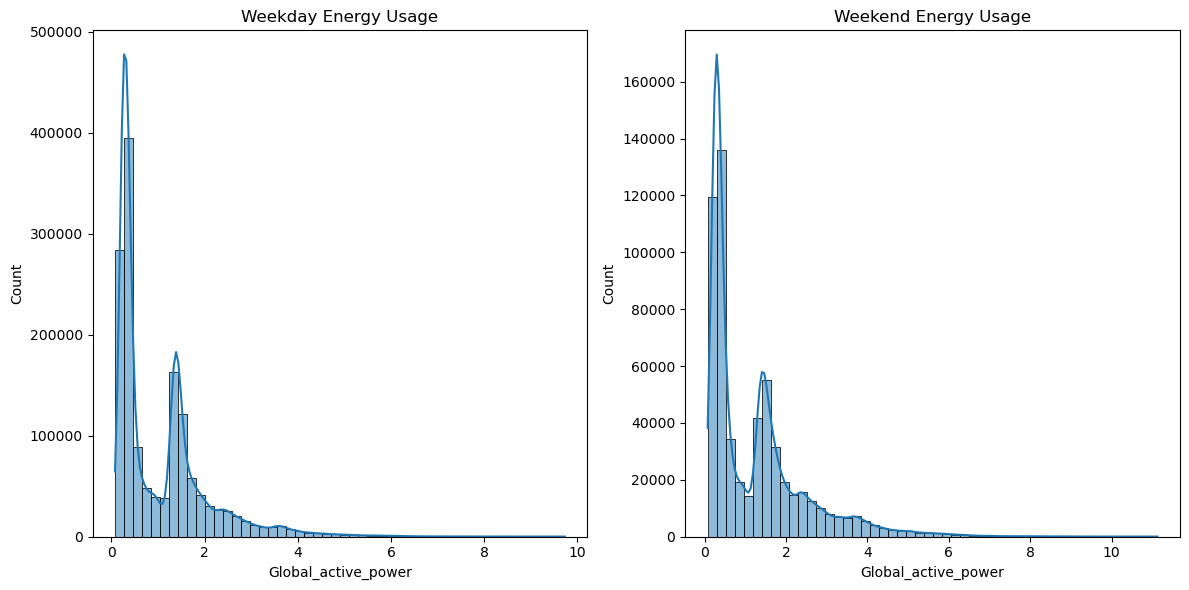

In [61]:
q_3 = prompt_1 + "Compare energy usage (Global_active_power) on weekdays vs weekends. Plot a bar graph of mean energy usage to show comparison and also plot histogram. An error is occuring 'cannot pass values for both x and y error' handle that."
groq_llama(q_3)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Extract the day of the week from the index
df_copy['day_of_week'] = df_copy.index.dayofweek

# Create a new column to distinguish between weekdays and weekends
df_copy['day_type'] = df_copy['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by day type and calculate the mean energy usage
mean_energy_usage = df_copy.groupby('day_type')['Global_active_power'].mean()

# Plot a bar graph of mean energy usage
plt.figure(figsize=(8,6))
mean_energy_usage.plot(kind='bar')
plt.title('Mean Energy Usage on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Mean Energy Usage (kW)')
plt.show()

# Plot a histogram of energy usage for weekdays and weekends
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df_copy[df_copy['day_type'] == 'Weekday']['Global_active_power'].plot.hist(bins=50, alpha=0.5, label='Weekday')
df_

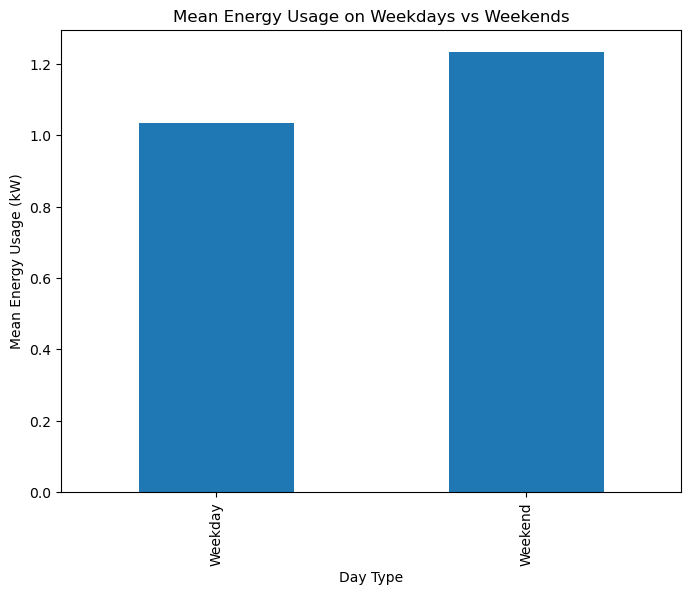

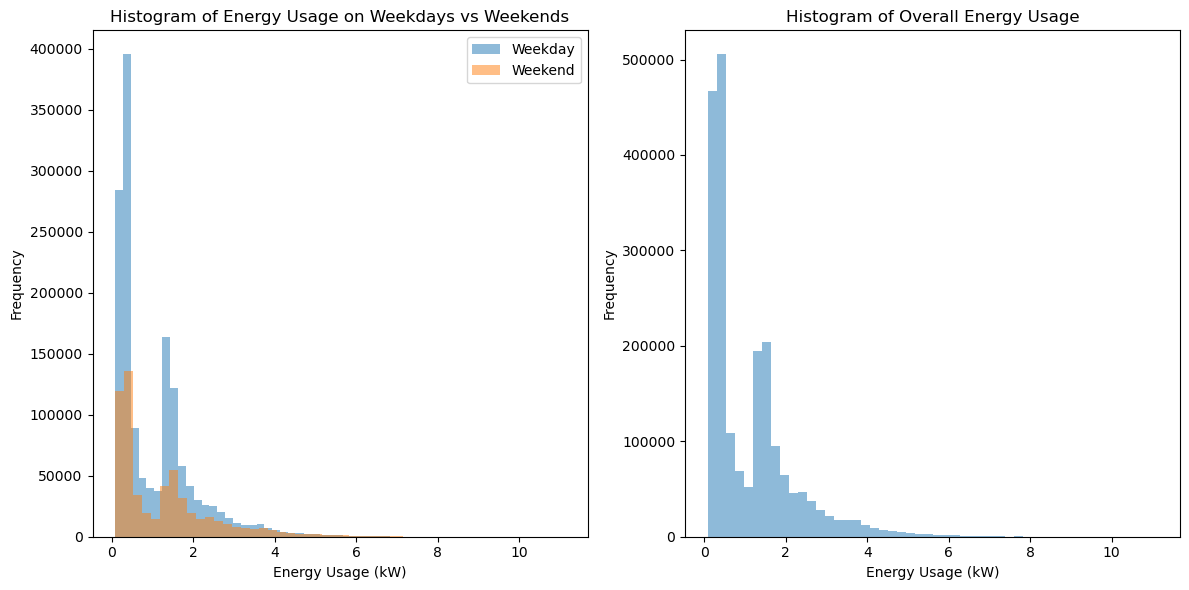

In [62]:
q_3 = prompt_2 + "Compare energy usage (Global_active_power) on weekdays vs weekends. Plot a bar graph of mean energy usage to show comparison and also plot histogram."
groq_llama(q_3)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'Global_active_power' column and a datetime index
df['day_of_week'] = df.index.dayofweek  # Create a new column for day of the week (0 = Monday, 6 = Sunday)

# Create a new column to differentiate between weekdays and weekends
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Calculate mean energy usage for weekdays and weekends
mean_energy_usage = df.groupby('day_type')['Global_active_power'].mean()

# Plot a bar graph of mean energy usage
plt.figure(figsize=(8, 6))
mean_energy_usage.plot(kind='bar')
plt.title('Mean Energy Usage by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Mean Energy Usage')
plt.show()

# Plot a histogram to compare energy usage on weekdays and weekends
plt.figure(figsize=(10, 6))
plt.hist(df[df['day_type'] == 'Weekday']['Global_active_power'], alpha=0.5, label='Weekday')
plt.hist(df[df['day_type'] == 'Weekend']['Glob

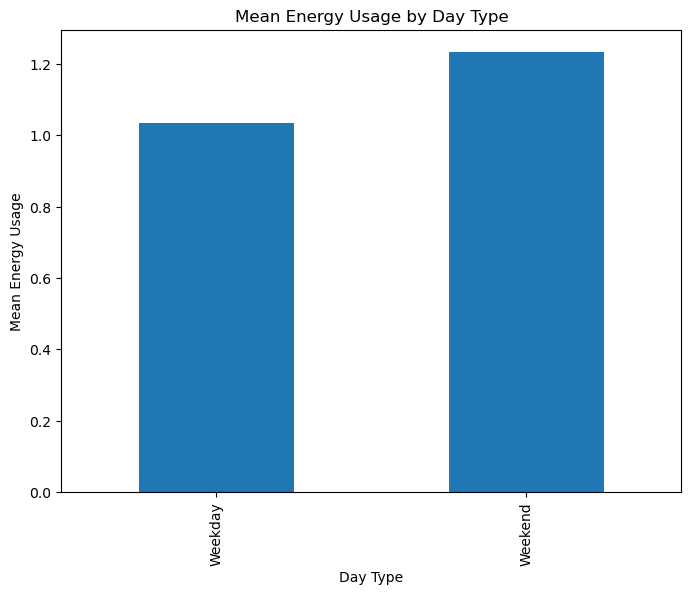

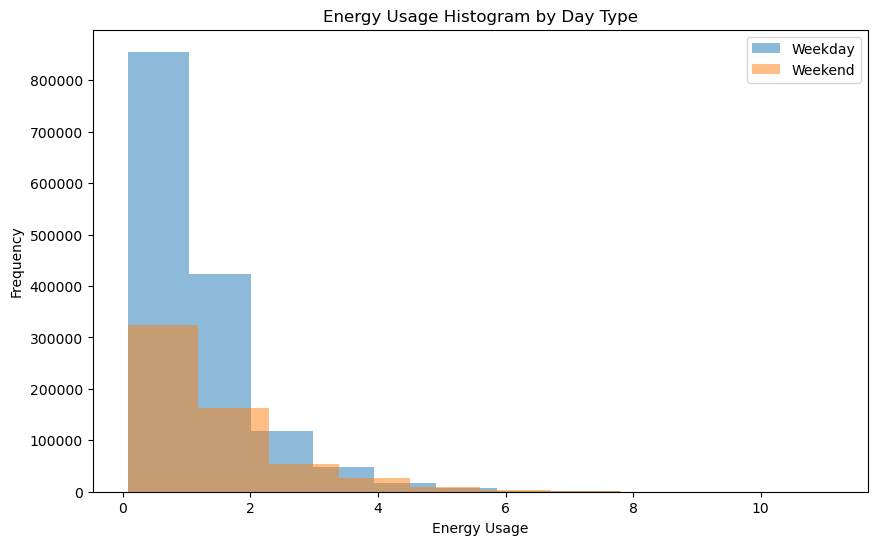

In [66]:
q_3 = "I have a dataframe named df with a column named Global_active_power and index of dataframe is datetime which is already parsed, write me a pandas code to compare energy usage on weekdays vs weekends and plot a bar graph of mean energy usage and also plot a histogram to compare it"
groq_llama(q_3)

### ii) My code

Average energy usage on weekdays vs weekends:
weekday_weekend
Weekday    1.035472
Weekend    1.234232
Name: Global_active_power, dtype: float64


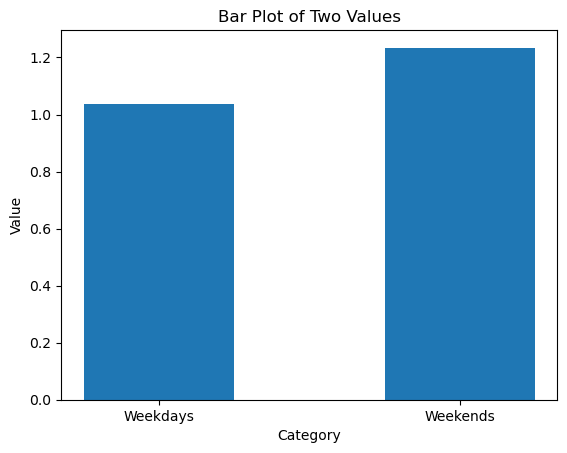

In [69]:
import pandas as pd
import numpy as np

df['weekday_weekend'] = ['Weekend' if x >= 5 else 'Weekday' for x in df.index.dayofweek]

energy_usage_comparison = df.groupby('weekday_weekend').Global_active_power.mean()
print("Average energy usage on weekdays vs weekends:")
print(energy_usage_comparison)

import matplotlib.pyplot as plt

labels = ['Weekdays', 'Weekends']
values = [energy_usage_comparison['Weekday'], energy_usage_comparison['Weekend']]

plt.bar(labels, values, width=0.5)
plt.title('Bar Plot of Two Values')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

All 3 prompts gave correct result, although I need to explain prompt_3 about what graph to plot but it did it.

# Question 4 Find days where energy consumption exceeded 5 kWh.
### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily energy consumption
daily_energy = df.resample('D').agg({'Global_active_power': 'sum'})

# Convert energy consumption from kW to kWh
daily_energy['Global_active_power'] = daily_energy['Global_active_power'] / 1000

# Find days where energy consumption exceeded 5 kWh
high_energy_days = daily_energy[daily_energy['Global_active_power'] > 5]

# Plot histogram of energy consumption
plt.figure(figsize=(10,6))
sns.histplot(daily_energy['Global_active_power'], kde=True)
plt.title('Histogram of Daily Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Plot bar graph of top 10 days with most energy consumption
top_10_days = daily_energy.nlargest(10, 'Global_active_power')
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_days.index, y=top_10_days['Global_active_power'])
plt.title('Top 10 Days with Most Energy Consumption')
plt.xlabel('Date')
plt

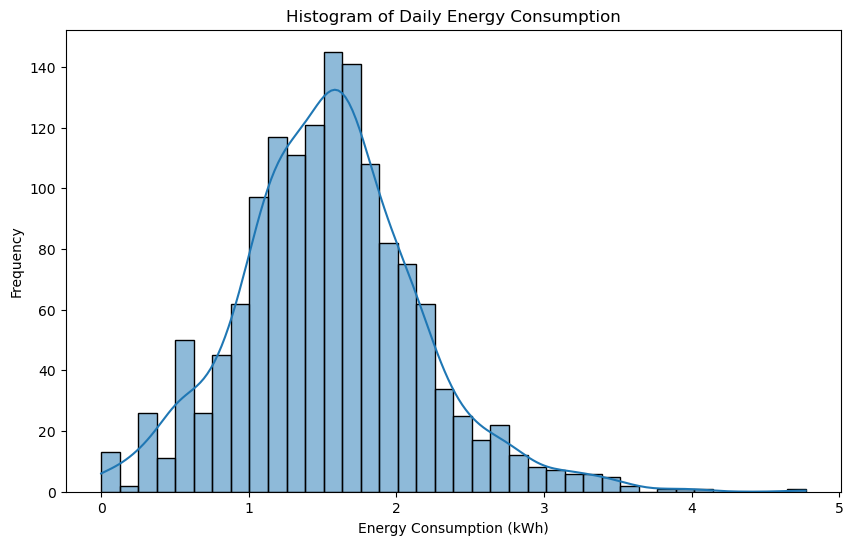

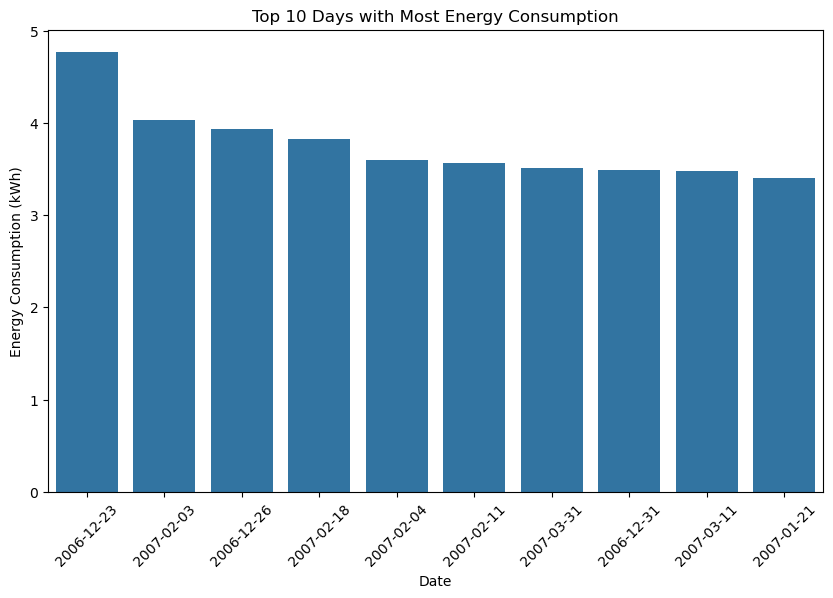

In [76]:
q_4 = prompt_1 + "Find days where energy consumption exceeded 5 kWh. Also plot histogram of energy consumption and plot bar graph of top 10 days with most energy consumption."
groq_llama(q_4)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Calculate total energy consumption per day
daily_energy_consumption = df.resample('D')['Global_active_power'].sum() / 1000  # convert to kWh

# Find days where energy consumption exceeded 5 kWh
exceeded_days = daily_energy_consumption[daily_energy_consumption > 5]

# Plot histogram of energy consumption
plt.figure(figsize=(10,6))
df['Global_active_power'].plot.hist(bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (kW)')
plt.ylabel('Frequency')
plt.show()

# Plot bar graph of top 10 days with most energy consumption
plt.figure(figsize=(10,6))
daily_energy_consumption.nlargest(10).plot(kind='bar', alpha=0.7, color='blue', edgecolor='black')
plt.title('Top 10 Days with Most Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()

print(exceeded_days)


Executing code output:



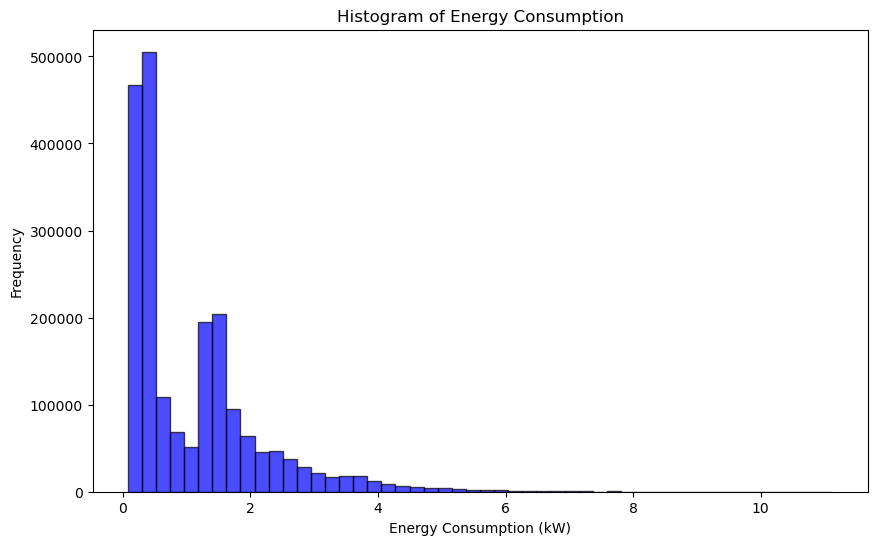

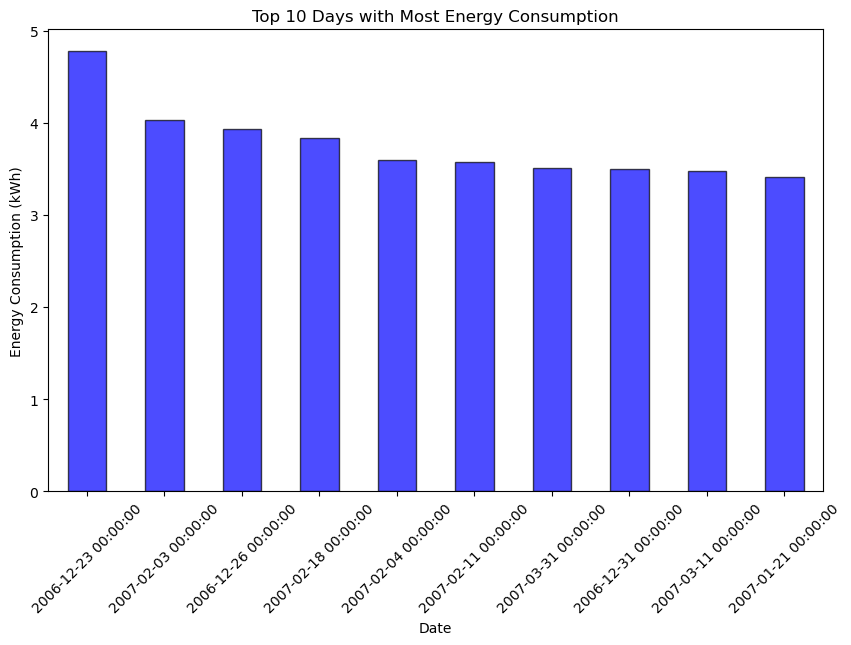

Series([], Freq: D, Name: Global_active_power, dtype: float64)


In [78]:
q_4 = prompt_2 + "Find days where energy consumption exceeded 5 kWh. Find days where energy consumption exceeded 5 kWh. Also plot histogram of energy consumption and plot bar graph of top 10 days with most energy consumption."
groq_llama(q_4)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily energy consumption
df_daily = df.resample('D').sum()

# Find number of days where energy consumption is more than 5 kWh
days_more_than_5kWh = (df_daily['Global_active_power'] > 5).sum()
print(f"Number of days where energy consumption is more than 5 kWh: {days_more_than_5kWh}")

# Plot histogram of energy consumption
plt.figure(figsize=(10,6))
plt.hist(df['Global_active_power'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (kW)')
plt.ylabel('Frequency')
plt.show()

# Plot bar graph of top 10 days with most energy consumption
top_10_days = df_daily['Global_active_power'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(top_10_days.index, top_10_days.values, color='blue')
plt.title('Top 10 Days with Most Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rot

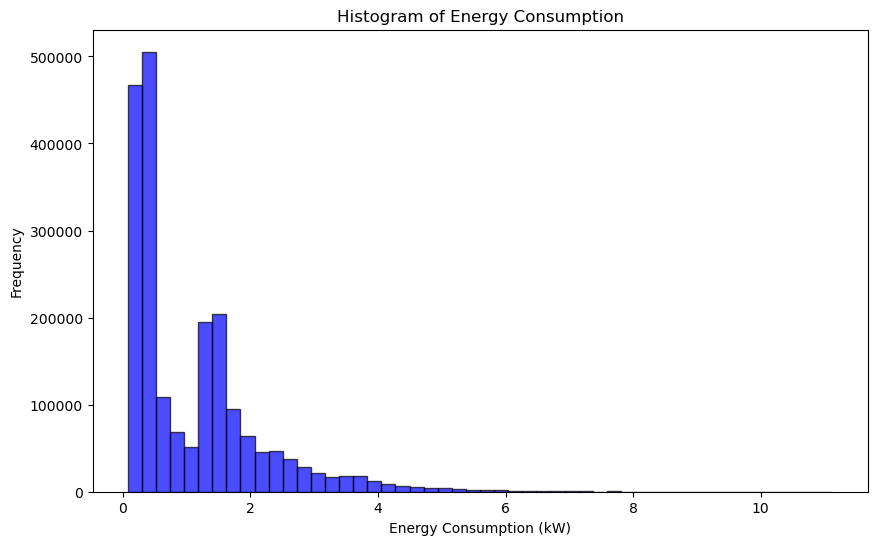

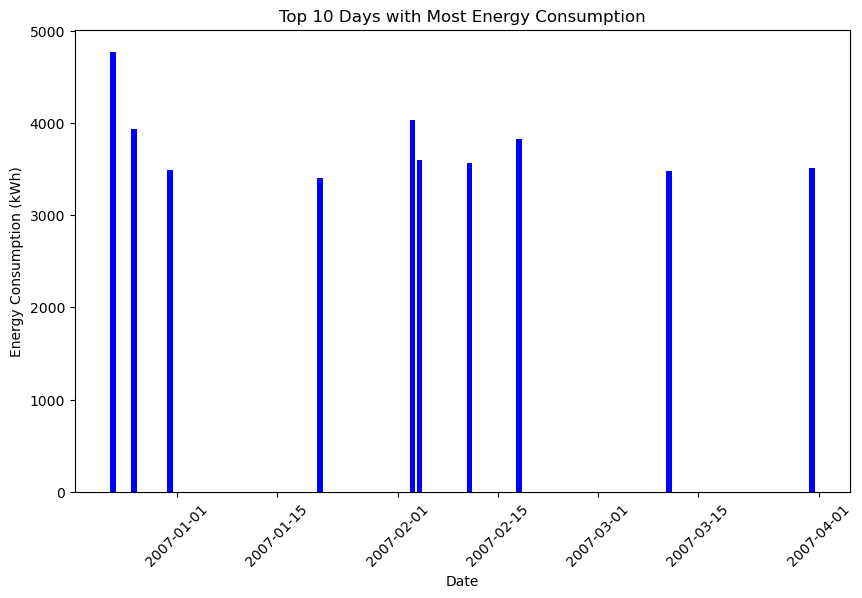

In [80]:
q_4 = "I have a dataframe named df with a column named Global_active_power (in kW and data is in minute-averaged) and index of dataframe is datetime which is already parsed, write me a pandas code to find number of days where energy consumption is more than 5 kW. Also plot histogram of energy consumption and plot bar graph of top 10 days with most energy consumption."
groq_llama(q_4)

### ii) My code

In [83]:
daily_power_sum = pd.DataFrame(df['Global_active_power'].resample('D').sum())
daily_power_sum['Global_active_power'] = daily_power_sum['Global_active_power']/60
daily_power_sum[daily_power_sum['Global_active_power'] > 5].count()

Global_active_power    1409
dtype: int64

In this only prompt_1 gave correct answer, prompt_3 was giving an error which i need to handle by giving the error into prompt and still gave incorrect result.

# Question 5 Plot the energy usage trend for the first week of January 2007.

### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the original dataframe
df_copy = df.copy()

# Filter the dataframe for the first week of January 2007
df_filtered = df_copy[(df_copy.index >= '2007-01-01') & (df_copy.index < '2007-01-08')]

# Calculate the active energy consumed every minute
df_filtered['other_energy'] = (df_filtered['Global_active_power']*1000/60 - df_filtered['Sub_metering_1'] - df_filtered['Sub_metering_2'] - df_filtered['Sub_metering_3'])

# Plot the energy usage trend
plt.figure(figsize=(12,6))
plt.plot(df_filtered.index, df_filtered['Global_active_power'], label='Global Active Power')
plt.plot(df_filtered.index, df_filtered['Sub_metering_1'], label='Sub-metering 1')
plt.plot(df_filtered.index, df_filtered['Sub_metering_2'], label='Sub-metering 2')
plt.plot(df_filtered.index, df_filtered['Sub_metering_3'], label='Sub-metering 3')
plt.plot(df_filtered.index, df_filtered['other_energy'], label='Other Energy')
plt.xlabel('Time')

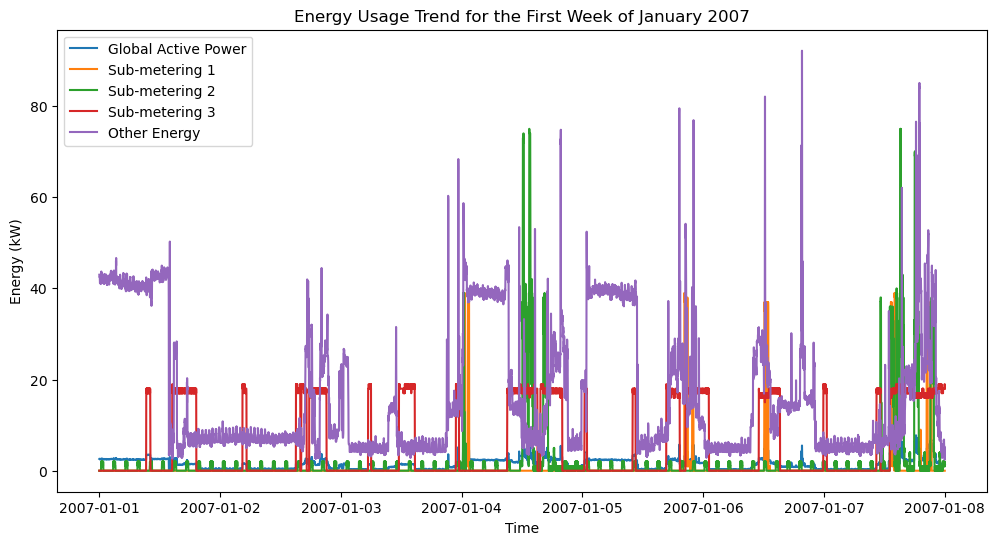

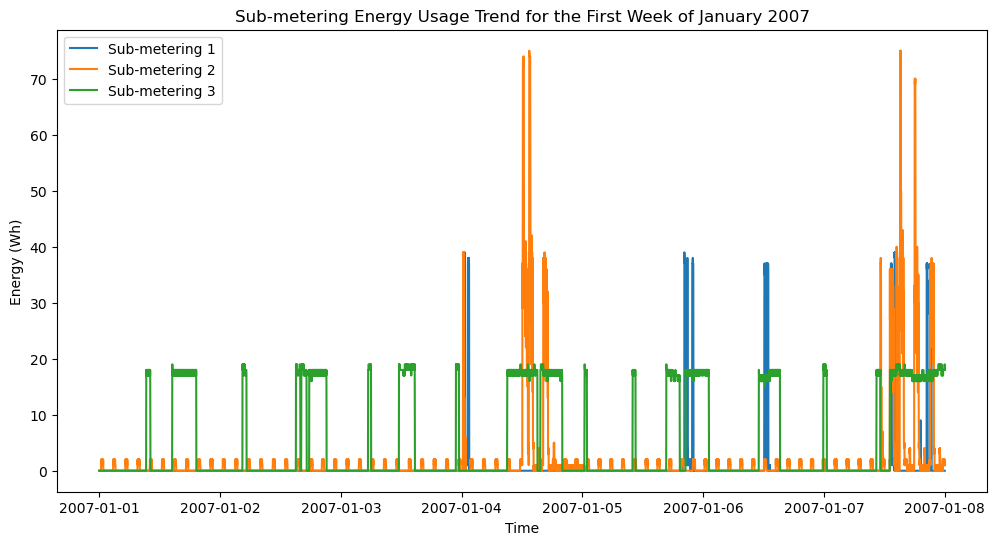

TypeError: agg function failed [how->mean,dtype->object]

In [88]:
q_5 = prompt_1 + "Plot the energy usage trend for the first week of January 2007."
groq_llama(q_5)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the first week of January 2007
df_filtered = df[(df.index >= '2007-01-01 00:00:00') & (df.index < '2007-01-08 00:00:00')].copy()

# Calculate total energy usage
df_filtered['Total_energy_usage'] = df_filtered['Global_active_power'] * 60  # Convert kW to Wh

# Plot energy usage trend
plt.figure(figsize=(12,6))
plt.plot(df_filtered.index, df_filtered['Total_energy_usage'], label='Total Energy Usage')
plt.plot(df_filtered.index, df_filtered['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df_filtered.index, df_filtered['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df_filtered.index, df_filtered['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Time')
plt.ylabel('Energy Usage (Wh)')
plt.title('Energy Usage Trend for the First Week of January 2007')
plt.legend()
plt.show()

# Plot voltage trend
plt.figure(figsize=(12,6))
plt.plot(df_filtered.index, df_filtered['Voltage'])
plt.xlabel('Time')

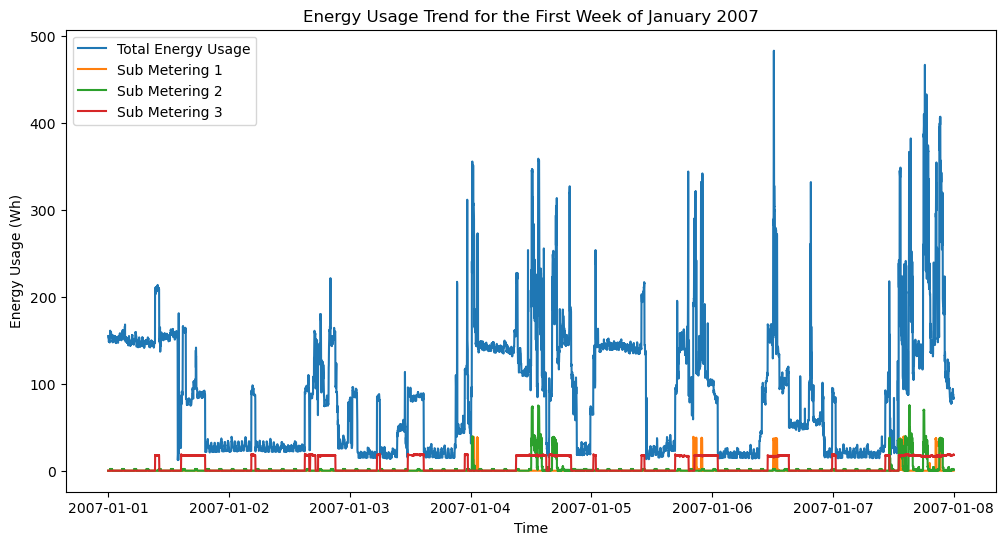

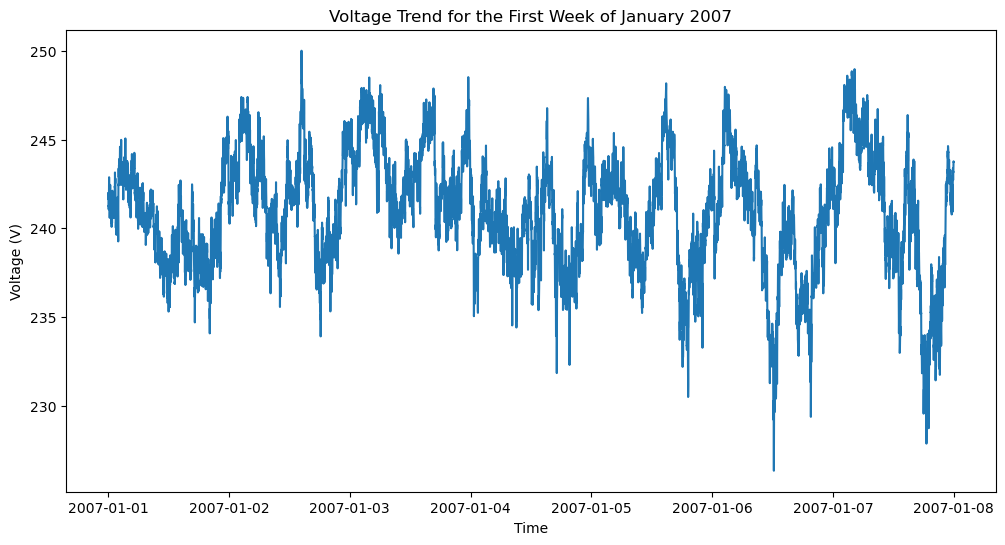

In [91]:
q_5 = prompt_2 + "Plot the energy usage trend for the first week of January 2007."
groq_llama(q_5)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the first week of January 2007
df_first_week_jan_2007 = df[(df.index.year == 2007) & (df.index.month == 1) & (df.index.day <= 7)]

# Convert Sub_metering columns from Wh to kW (1 kW = 1000 Wh, 1 minute = 1/60 hour)
df_first_week_jan_2007['Sub_metering_1'] = df_first_week_jan_2007['Sub_metering_1'] / 1000 / 60
df_first_week_jan_2007['Sub_metering_2'] = df_first_week_jan_2007['Sub_metering_2'] / 1000 / 60
df_first_week_jan_2007['Sub_metering_3'] = df_first_week_jan_2007['Sub_metering_3'] / 1000 / 60

# Plot the energy usage trend
plt.figure(figsize=(10,6))
plt.plot(df_first_week_jan_2007['Global_active_power'], label='Global Active Power')
plt.plot(df_first_week_jan_2007['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df_first_week_jan_2007['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df_first_week_jan_2007['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Time')
plt.ylabel('P

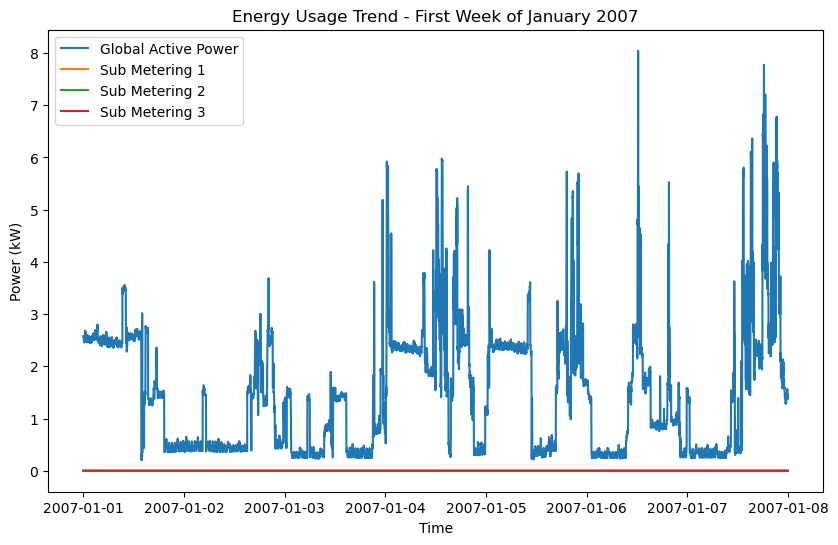

In [94]:
q_5 = "I have a dataframe named df with a column named Global_active_power (in kW and data is in minute-averaged) and 3 other columns named Sub_metering_1, Sub_metering_2, Sub_metering_3 all in Wh and index of dataframe is datetime which is already parsed, write me a pandas code to plot energy usage trend of first week of Jan 2007"
groq_llama(q_5)

### ii) My code

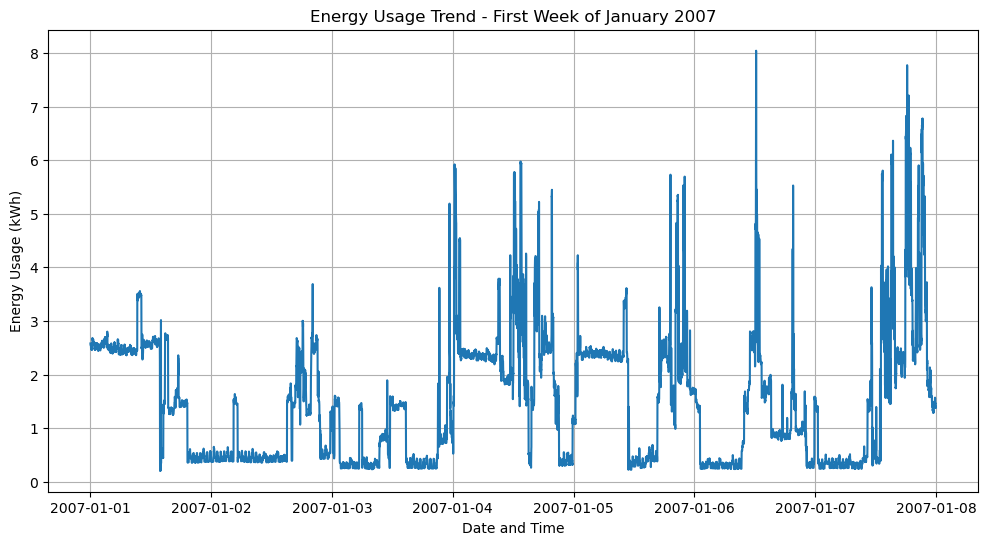

In [97]:
first_week_jan_2007 = df.loc['2007-01-01':'2007-01-07']
plt.figure(figsize=(12, 6))
plt.plot(first_week_jan_2007.index, first_week_jan_2007.Global_active_power)
plt.title('Energy Usage Trend - First Week of January 2007')
plt.xlabel('Date and Time')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True)
plt.show()

All 3 prompts correclty generated code and graph for this query

# Question 6 Find the average voltage for each day of the first week of February 2007.
### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Filter the dataframe for the first week of February 2007
df_feb_2007 = df_copy[(df_copy.index >= '2007-02-01') & (df_copy.index < '2007-02-08')]

# Group by day and calculate the average voltage
avg_voltage = df_feb_2007.groupby(df_feb_2007.index.date)['Voltage'].mean()

# Plot the average voltage for each day
plt.figure(figsize=(10,6))
plt.plot(avg_voltage.index, avg_voltage.values, marker='o')
plt.title('Average Voltage for Each Day of the First Week of February 2007')
plt.xlabel('Date')
plt.ylabel('Average Voltage (V)')
plt.grid(True)
plt.show()


Executing code output:



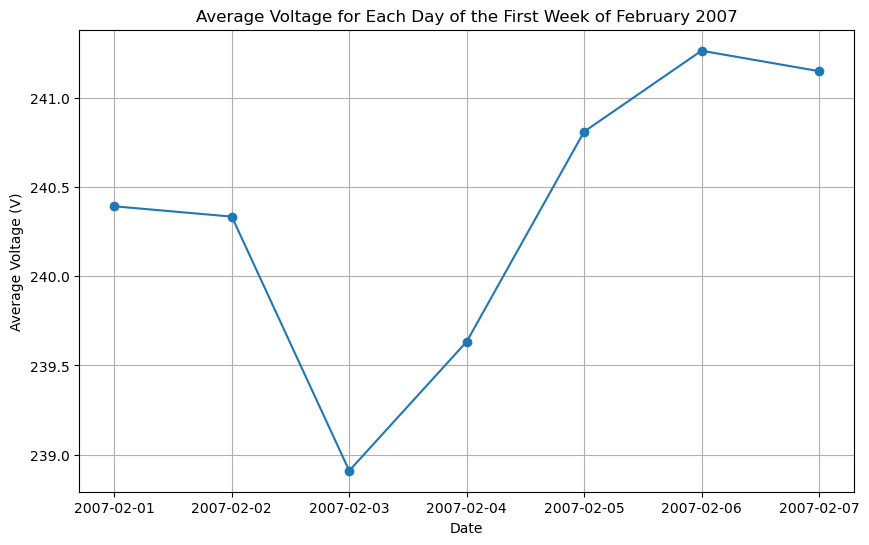

In [102]:
q_6 = prompt_1 + "Find the average voltage for each day of the first week of February 2007."
groq_llama(q_6)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the first week of February 2007
df_filtered = df[(df.index >= '2007-02-01') & (df.index < '2007-02-08')]

# Group by day and calculate average voltage
df_avg_voltage = df_filtered['Voltage'].resample('D').mean()

# Print the average voltage for each day
print(df_avg_voltage)

# Plot the average voltage for each day
plt.figure(figsize=(10,6))
df_avg_voltage.plot(kind='bar')
plt.title('Average Voltage for Each Day of the First Week of February 2007')
plt.xlabel('Date')
plt.ylabel('Average Voltage (V)')
plt.show()


Executing code output:

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64


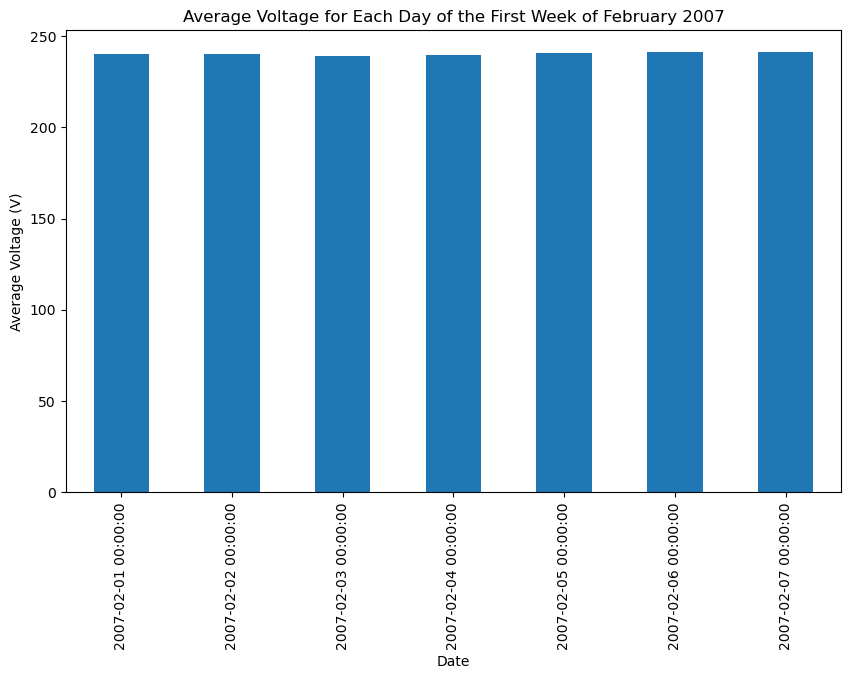

In [105]:
q_6 = prompt_2 + "Find the average voltage for each day of the first week of February 2007."
groq_llama(q_6)

## Prompt 3

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe for the first week of February 2007
df_filtered = df[(df.index.year == 2007) & (df.index.month == 2) & (df.index.day <= 7)]

# Group by day and calculate the average voltage
df_avg_voltage = df_filtered.groupby(df_filtered.index.date)['Voltage'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10,6))
plt.plot(df_avg_voltage['index'], df_avg_voltage['Voltage'], marker='o')
plt.title('Average Voltage Usage per Day in the First Week of February 2007')
plt.xlabel('Date')
plt.ylabel('Average Voltage (V)')
plt.grid(True)
plt.show()


Executing code output:



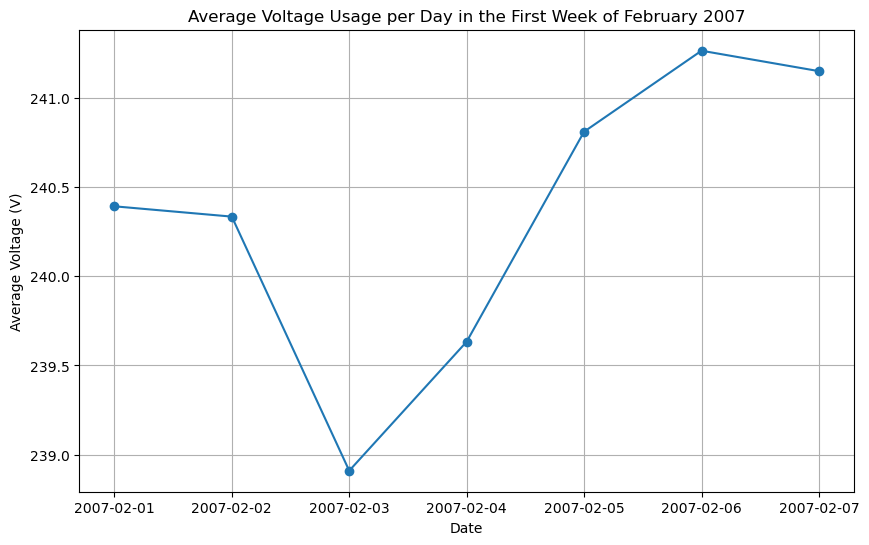

In [116]:
q_6 = "I have a dataframe named df with a column named Voltage (in V) and index of dataframe is datetime which is already parsed, write me a pandas to plot a line graph of average voltage usage each day of first week of Feb 2007."
groq_llama(q_6)

### ii) My code

Average voltage for each day of the first week of February 2007:
datetime
1    240.392139
2    240.334389
3    238.910194
4    239.633333
5    240.810312
6    241.264160
7    241.149694
Name: Voltage, dtype: float64


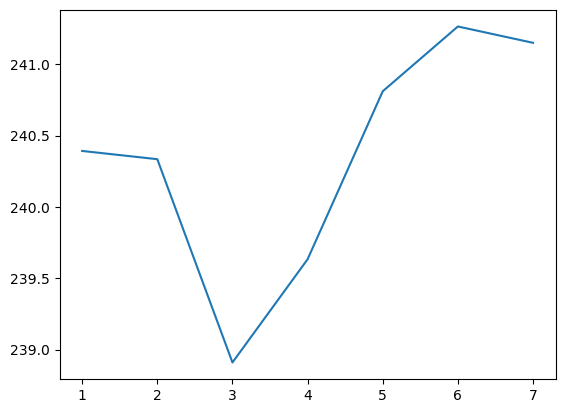

In [119]:
first_week_feb_2007 = df.loc['2007-02-01':'2007-02-07']
average_voltage_feb_2007 = first_week_feb_2007.Voltage.groupby(first_week_feb_2007.index.day).mean()
print("Average voltage for each day of the first week of February 2007:")
print(average_voltage_feb_2007)

plt.plot(average_voltage_feb_2007.index, average_voltage_feb_2007.values)

Cleary prompt_3 is giving wrong graphs whereas prompt_1 and prompt_2 gives correct result.

# Question 7 What is the correlation between global active power and sub-metering values?
### i) LLM Generated Answer

## Prompt 1

Extracted code:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Select relevant columns
df_relevant = df_copy[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Calculate correlation matrix
corr_matrix = df_relevant.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Executing code output:



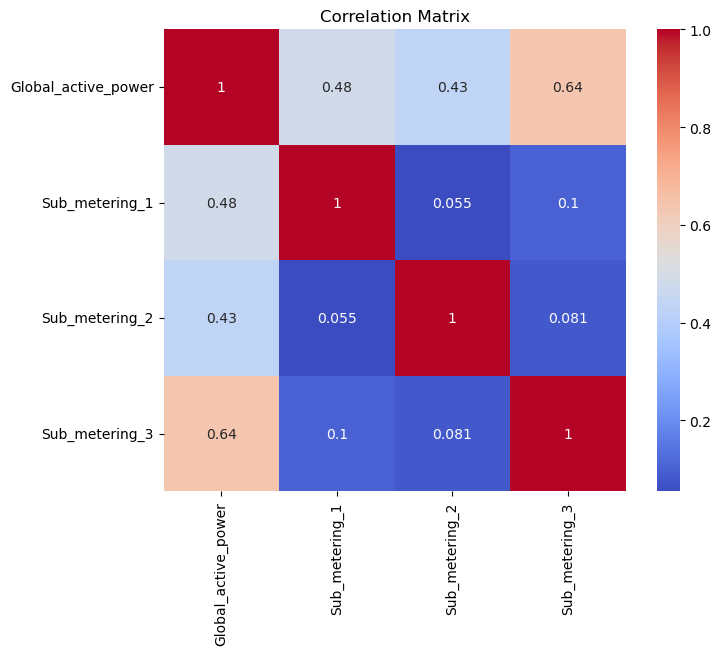

In [131]:
q_7 = prompt_1 + "What is the correlation between global active power and sub-metering values? Only plot correlation matrix"
groq_llama(q_7)

## Prompt 2

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Select relevant columns
relevant_columns = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Calculate correlation matrix
corr_matrix = df_copy[relevant_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Executing code output:



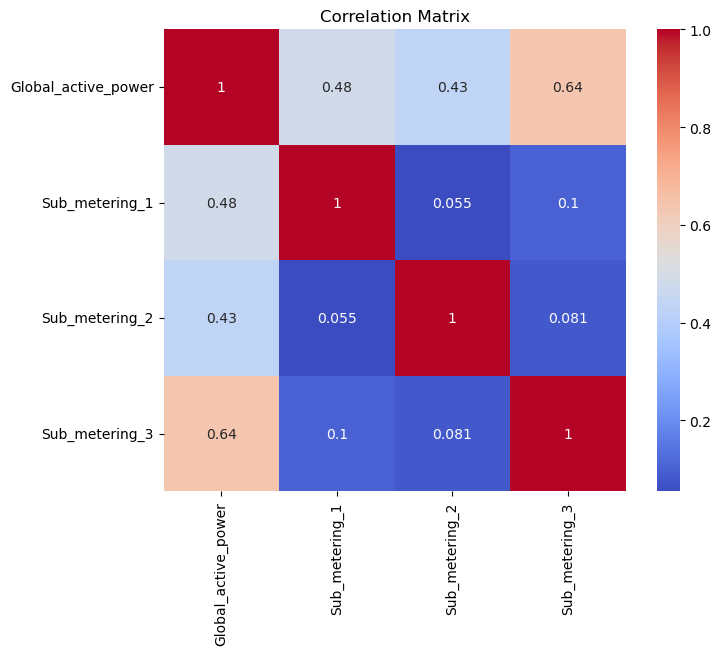

In [133]:
q_7 = prompt_2 + "What is the correlation between global active power and sub-metering values? Only plot correlation matrix"
groq_llama(q_7)

## Prompt 3

Extracted code:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Executing code output:



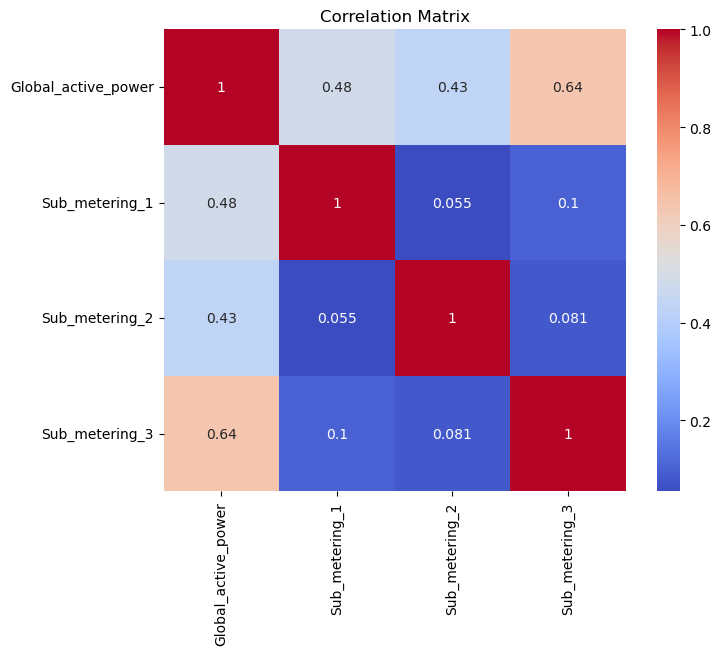

In [137]:
q_7 = "I have a dataframe named df with a column named Global_active_power (in kW and data is in minute-averaged) and 3 other columns named Sub_metering_1, Sub_metering_2, Sub_metering_3 all in Wh and index of dataframe is datetime which is already parsed, write me a pandas code to plot a correlation matrix of these 4 columns"
groq_llama(q_7)

### ii) My code

In [140]:
correlation_matrix = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
print("Correlation between Global Active Power and Sub-metering values:")
print(correlation_matrix['Global_active_power'])

Correlation between Global Active Power and Sub-metering values:
Global_active_power    1.000000
Sub_metering_1         0.484401
Sub_metering_2         0.434569
Sub_metering_3         0.638555
Name: Global_active_power, dtype: float64


All three performed correctly

## Bonus Query: Find average consumption of March 1999
#### Here Prompt 1 knows such data doesnt exist and prompt 2 is unaware of it

### Prompt 1 (Here the LLM successfully says that no data available and write functions about earliest data available, sometime it write the code of March 1999 but in code comments it writes this (Note: Data is between December 2006 and November 2010, so no data for March 1999))

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for March 1999
df_march_1999 = df[(df.index.year == 1999) & (df.index.month == 3)]

# Calculate average active power consumption
avg_active_power = df_march_1999['Global_active_power'].mean()

# Calculate daily power consumption
daily_power = df_march_1999['Global_active_power'].resample('D').mean()

# Plot daily power consumption
plt.figure(figsize=(10,6))
plt.plot(daily_power.index, daily_power.values)
plt.title('Daily Power Consumption in March 1999')
plt.xlabel('Date')
plt.ylabel('Power Consumption (kW)')
plt.grid(True)
plt.show()

print(f'Average active power consumption in March 1999: {avg_active_power} kW')


Executing code output:



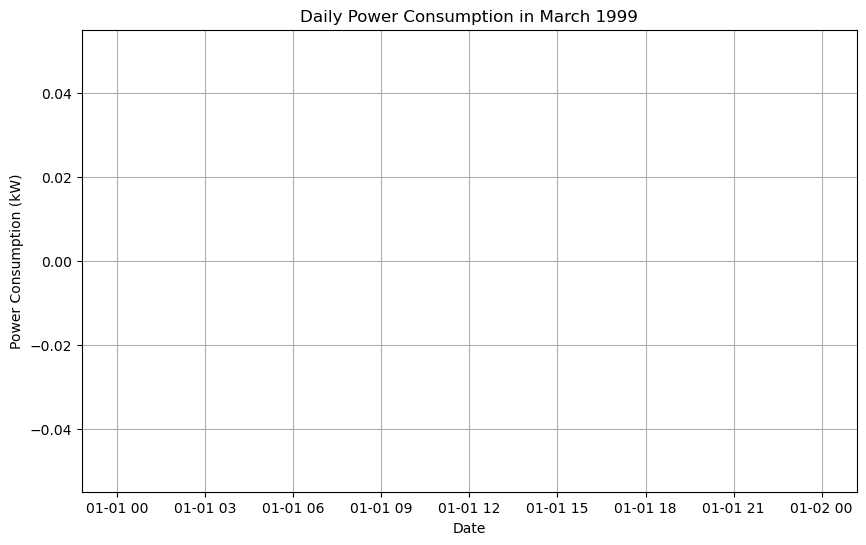

Average active power consumption in March 1999: nan kW


In [145]:
q_8 = prompt_1 + "What was the average active power consumption in March 1999? Also plot daily power consumption of that duration."

groq_llama(q_8)

### Prompt 2 (Here LLM is not aware about such thing and plots a graph where no data exists)

Extracted code:

import pandas as pd
import matplotlib.pyplot as plt

# Filter data for March 1999
march_1999 = df[(df.index.year == 1999) & (df.index.month == 3)].copy()

# Calculate average active power consumption in March 1999
avg_active_power = march_1999['Global_active_power'].mean()
print(f"Average active power consumption in March 1999: {avg_active_power} kW")

# Calculate daily power consumption
daily_power = march_1999['Global_active_power'].resample('D').sum()

# Plot daily power consumption
plt.figure(figsize=(10,6))
plt.plot(daily_power.index, daily_power.values)
plt.xlabel('Date')
plt.ylabel('Daily Power Consumption (kWh)')
plt.title('Daily Power Consumption in March 1999')
plt.grid(True)
plt.show()


Executing code output:

Average active power consumption in March 1999: nan kW


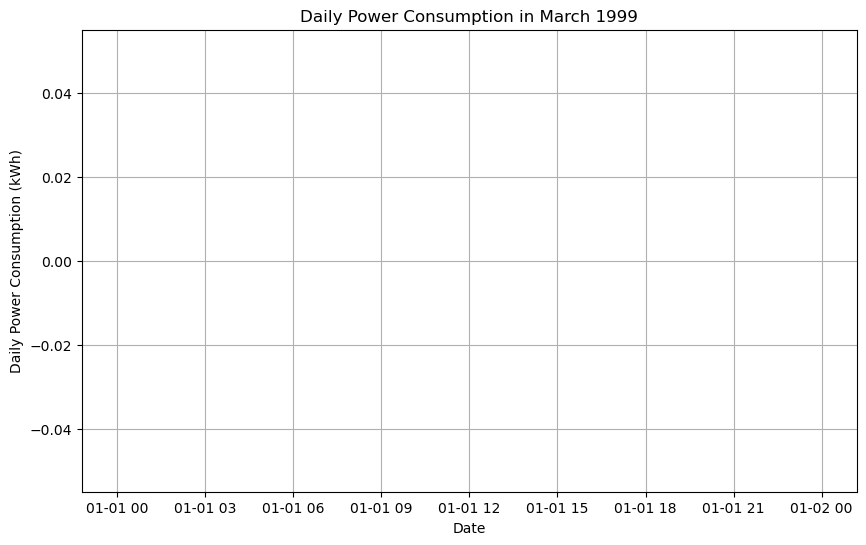

In [148]:
q_8 = prompt_2 + "What was the average active power consumption in March 1999? Also plot daily power consumption of that duration."

groq_llama(q_8)

## Prompt 3

# Conclusion

By writing two types of prompts, using Global prompt LLM is able to correclty generate code and provide answers to the queries asked, however, Local prompt failed for some queries and requires more detailed prompt to generate correct answer.

LLM gave correct answers and graphs of all 7 queries asked.

However, when a query out of these 7 given queries is asked i.e, when asked to tell average active power consumption in March 1999 (Data that does not exist in dataset), the prompt with all the information tells that no data exists and uses the earliest data. On the other hand, other prompt didnt recognised it and gave a empty graph instead.

This proves that both types of prompts have its own pros and cons.

Global Approach (with its variations)

Advantages:

1. Comprehensive Context: Provides the LLM with a rich understanding of the dataset, problem, and constraints upfront. This can lead to more accurate, relevant, and robust code generation or analysis, especially for complex or nuanced queries.
2. Reduced Ambiguity: With all the necessary information readily available, the LLM is less likely to misinterpret queries or make assumptions.
3. Consistency: Helps maintain consistency in the LLM's responses across different queries, as the core understanding remains stable.
4. Easier for Complex Tasks: For tasks that involve multiple steps, specific domain knowledge (like "how to calculate active energy consumed"), or require adherence to strict guidelines (like "prioritize memory-efficient operations"), a global prompt provides the necessary scaffolding.
5. Better for Iterative Development: If you're going to ask a series of related questions about the same dataset, the global prompt sets the stage effectively for all of them without needing to repeat context.

Disadvantages:

1. Token Usage/Cost: Longer prompts consume more tokens, which can increase API costs and potentially impact response time.
Model Capacity Limits: LLMs have a maximum context window (the number of tokens they can process at once). A very long global prompt might exceed this limit, leading to truncation or degraded performance.

2. Irrelevant Information Overhead: For very simple queries, a global prompt might include a lot of information that isn't strictly necessary, potentially "diluting" the focus of the current query for the LLM.
3. Potential for "Prompt Fatigue": If the LLM has to constantly re-evaluate a very long global prompt for every short query, it might become less efficient or even lose focus.

Local Approach

Advantages:

1. Efficiency: For simple, straightforward queries, a concise local prompt can be processed much faster and consume fewer tokens, leading to quicker and cheaper responses.
2. Targeted Responses: The LLM focuses precisely on the information needed for that specific query, potentially leading to more direct and less verbose answers.
3. Reduced Cognitive Load for LLM: Without a lot of extraneous information, the LLM can dedicate its processing power to solving the immediate problem.
4. Flexibility: Allows for easy adaptation to new types of queries without needing to re-engineer a large global prompt.

Disadvantages:

1. Lack of Context: For complex tasks, the absence of broader context can lead to incomplete, inaccurate, or generic responses.
2. Increased Prompt Engineering per Query: You need to carefully craft each local prompt to ensure it contains all the necessary information for that specific query, which can be time-consuming for many different queries.
3. Potential for Inconsistency: Without a shared global understanding, responses to similar queries might vary more.
4. Difficulty with Dependencies: If a query depends on information from a previous step or requires domain-specific knowledge not included in the local prompt, the LLM might struggle.